In [2]:
# -*- coding: utf-8 -*-
%matplotlib inline

# import
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import leastsq 
import matplotlib.pyplot as plt

In [3]:
Cs137 = pd.read_csv("Au198.csv")
Cs137

,cond,count,time,count_err,run
0,Au,1750.8310,0.041667,33.840132,42
1,Au,1431.6100,0.916667,27.924817,43
2,Au,310.8236,6.916667,9.778796,44
3,Au,248.2771,7.916667,7.888158,45


In [4]:
time = np.array(Cs137["time"])
count = np.array(Cs137["count"]) 
err = np.array(Cs137["count_err"])

## Au


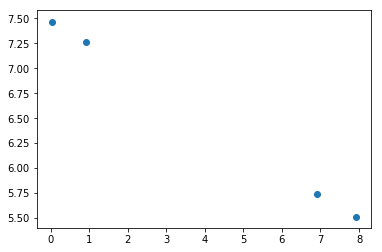

In [5]:
plt.scatter(time,np.log(count))

In [6]:
def func(x, a1, a2):
    return a1 +a2*x

def fit_func(param, x, y, err):
    a1, a2 = param
    residual = (y - func(x, a1, a2))/err
    return residual


b1     : 7.486183813047374
b1_err : 0.014691469203647093
b2     : -0.25038345571171783
b2_err : 0.003741720283819542
reduced_chi_square : 0.2554831519484538


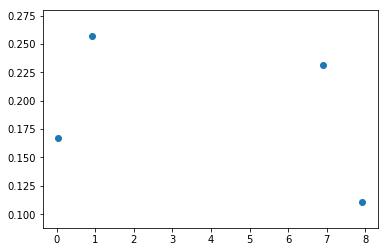

In [7]:
param = [0, 0]
result = leastsq(fit_func, param, args=(time, np.log(count),err/count), full_output=True)

b1, b2 = result[0]
b1_err = np.sqrt(result[1][0, 0])
b2_err = np.sqrt(result[1][1, 1])

print("b1     : "+ str(b1))
print("b1_err : " + str(b1_err))
print("b2     : "+ str(b2))
print("b2_err : "+ str(b2_err))

chi = fit_func((b1, b2), time, np.log(count), err/count)
plt.scatter(time, chi*chi)

chi_square = sum(chi*chi)
print("reduced_chi_square : " + str(chi_square /3) )

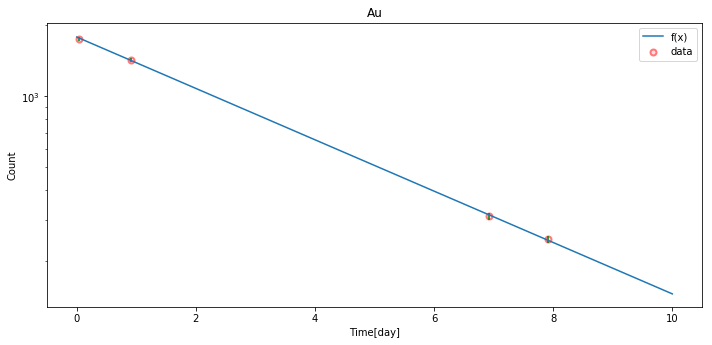

In [8]:
fig = plt.figure(figsize=(10, 9))

ax1 =fig.add_subplot(2,1,1)

#plot_Pb
ax1.set_title("Au")
ax1.set_xlabel("Time[day]")
ax1.set_ylabel("Count")
ax1.set_yscale("log")

ax1.scatter(time, count,c="pink", alpha=0.5, linewidths="2",edgecolors="red",label="data")
#ax1.set_xlim(-10,20)
#ax1.set_ylim(4000,20000)
x_1 = np.linspace(0,10)
ax1.plot(x_1, np.exp(func(x_1, b1, b2)),label="f(x)")
ax1.errorbar(time, count, yerr=err,fmt="none", ecolor="g")
ax1.legend()

fig.tight_layout()
plt.savefig("Au.png")
#plt.show()

In [9]:
T_0 = np.log(2)/-b2
T_0

2.7683425751500494

In [10]:
T_err = np.log(2)/((-b2)*(-b2))*b2_err
T_err

0.04137000001280595